In [70]:
import data_smoothing
import find_peaks
import peak_character

# Load TA data

In [71]:
data_nm, data_time, data_z = data_smoothing.load_data_csv('exp06_20180119 -t0 -chirp.csv', 500, 800, 0)

# Smooth data

In [72]:
smooth_matx = data_smoothing.earth_smooth_matrix(data_nm, data_z)

/usr/local/lib/python3.5/dist-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/usr/local/lib/python3.5/dist-packages/sklearn_contrib_py_earth-0.1.0-py3.5-linux-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


# Find Peaks

In [73]:
threshold = 0
mindist = 0
idx, height, fwhm = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

In [74]:
idx.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,595.000000,477.000000,351.000000,231.000000,160.000000,101.000000,67.000000,39.000000,15.000000,7.000000,1.0
mean,115.505882,176.052411,201.555556,209.528139,215.493750,220.366337,224.940299,231.179487,232.666667,236.000000,241.0
std,65.502393,36.196119,31.782235,29.022148,24.365146,19.398826,14.656554,9.875200,8.885515,6.271629,NaN
min,9.000000,21.000000,38.000000,53.000000,64.000000,111.000000,170.000000,203.000000,211.000000,224.000000,241.0
25%,47.000000,167.000000,188.000000,195.000000,201.750000,210.000000,219.000000,224.000000,230.000000,234.000000,241.0
50%,120.000000,174.000000,210.000000,219.000000,219.500000,222.000000,229.000000,231.000000,231.000000,239.000000,241.0
75%,173.000000,194.000000,222.000000,230.000000,235.000000,236.000000,238.500000,239.500000,240.000000,240.000000,241.0
max,242.000000,244.000000,247.000000,245.000000,247.000000,246.000000,243.000000,246.000000,241.000000,241.000000,241.0


In [75]:
height.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,595.000000,477.000000,351.000000,231.000000,160.000000,101.000000,67.000000,39.000000,15.000000,7.000000,1.000000
mean,-0.000091,-0.000198,-0.000169,-0.000147,-0.000098,-0.000094,-0.000113,-0.000081,-0.000071,-0.000079,-0.000167
std,0.000157,0.000211,0.000234,0.000214,0.000182,0.000196,0.000205,0.000169,0.000144,0.000165,NaN
min,-0.000814,-0.000874,-0.000842,-0.000954,-0.000611,-0.000613,-0.000713,-0.000387,-0.000242,-0.000358,-0.000167
25%,-0.000155,-0.000321,-0.000325,-0.000233,-0.000210,-0.000206,-0.000192,-0.000203,-0.000161,-0.000155,-0.000167
50%,-0.000026,-0.000141,-0.000137,-0.000117,-0.000076,-0.000099,-0.000116,-0.000124,-0.000119,-0.000069,-0.000167
75%,0.000016,-0.000038,0.000027,0.000005,0.000038,0.000044,-0.000062,0.000041,0.000022,0.000016,-0.000167
max,0.000079,0.000153,0.000347,0.000355,0.000238,0.000474,0.000579,0.000354,0.000287,0.000152,-0.000167


In [ ]:
height.loc[100:]

In [ ]:
data_nm.shape[0]

# Visualizer Function

In [76]:
import numpy as np
from scipy.optimize import differential_evolution
from scipy.special import gamma

def singleexpfunc(t, params):
    exp_array = 1-params[0] *np.exp((-1.0/params[1]) * t)

    return exp_array

def fit_single_exp_diffev(t, data):
    a1_bounds = (0, 2)
    tau1_bounds = (0, 100)
    params = [a1_bounds, tau1_bounds]
    time_array = t
    data_array = data
    def fit(params):
        decaymodel = singleexpfunc(time_array, params[:])
        cost = np.sum(((data_array - decaymodel) ** 2.0))
        return cost
    bestfit = differential_evolution(fit, bounds = bounds, polish = True)
    bestfit_params = bestfit.x
    def bestfit_decay(params):
        decaymodel = singleexpfunc(time_array, params[:])
        return decaymodel    
    bestfit_model = bestfit_decay(bestfit_params)   
    
    ss_res = np.sum((data_array - bestfit_model) ** 2.0)
    ss_tot = np.sum((data_array - np.mean(data_array)) ** 2.0)
    rsquare = 1 - (ss_res / ss_tot)
    
    return bestfit_params, bestfit_model, data_array, time_array

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit

def visualize(peak_dict, data_nm):
    for i in range(len(peak_dict)):
        df = pd.DataFrame(peak_dict['peak_%s' % i], 
        columns=['Position', 'Height', 'Width', 'Time'])
        df = df.drop_duplicates(subset= 'Time')
        df = df.reset_index(drop=True)
        height_norm = np.linalg.norm(df['Height'], keepdims=True)
        fit_params, exp_fit, data, time = fit_single_exp_diffev(df['Time'], df['Height'])
        
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
        
        ax1.plot(df['Time'], df['Height'], '.')
        #ax1.plot(exp fit)
        #ax1.axis(between 0 and 1?)
        ax1.set_title('Peak %s Dynamics' % (i+1), fontsize=18, fontweight='bold')
        ax1.set_ylabel('Intensity', fontsize=18, fontweight='bold')
        ax1.grid()
        
        ax2.plot(df['Time'], df['Position'], '.')
        ax2.plot(np.unique(df['Time']), np.poly1d(np.polyfit(df['Time'], df['Position'], 1))(np.unique(df['Time'])))
        ax2.set_ylabel('Position', fontsize=18, fontweight='bold')
        ax2.set_ylim((0, data_nm.shape[0]))
        ax2.grid()
        
        ax3.plot(df['Time'], df['Width'], '.')
        ax3.plot(np.unique(df['Time']), np.poly1d(np.polyfit(df['Time'], df['Width'], 1))(np.unique(df['Time'])))
        ax3.set_ylabel('Width', fontsize=18, fontweight='bold')
        ax3.set_xlabel('Time', fontsize=18, fontweight='bold')
        ax3.grid()
        
    return

# Classify Peaks - KMeans

In [78]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

def data_grouping(index_df, height_df, fwhm_df):
    peak_list = []
    
    for i in range(index_df.shape[0]):
        for j in range(index_df.shape[1]):
            peak_list.append(
            [index_df.loc[i,j], height_df.loc[i,j], fwhm_df.loc[i,j], i])
        
    all_points = pd.DataFrame(peak_list, 
    columns=['Position', 'Height', 'Width', 'Time'])
    fill_na = all_points.fillna(value=0)
    corrected_output = fill_na.drop(fill_na[abs(fill_na.Height) < 0.0002].index)
    corrected_output = corrected_output.reset_index(drop=True)
    
    return corrected_output

def cluster_classifier(index_df, corrected_output):
    found_peak = index_df.shape[1]
    cluster = KMeans(n_clusters=found_peak).fit(corrected_output.iloc[:,:-2])
    print(cluster.labels_)
    print(cluster.cluster_centers_)
    cluster_dict = {}
    
    for i in range(found_peak):
            cluster_dict['peak_%s' % i] = []
            
    for j in range(corrected_output.shape[0]):
        peak = cluster.predict([corrected_output.values[j,:-2]])
        for k in range(found_peak):
            if (peak == k):
                cluster_dict['peak_%s' % k].append(corrected_output.values[j])
                #print('found a match')

    peak_dict = { k:v for k, v in cluster_dict.items() if len(v) >= 5}
    return peak_dict

In [79]:
corrected_output = data_grouping(idx, height, fwhm)
corrected_output.describe()

,Position,Height,Width,Time
count,639.000000,639.000000,639.000000,639.000000
mean,199.269171,-0.000359,54.681635,200.278560
std,29.098086,0.000201,35.399951,172.899741
min,114.000000,-0.000954,4.793000,3.000000
25%,173.000000,-0.000459,25.244000,75.000000
50%,203.000000,-0.000338,40.539000,152.000000
75%,222.000000,-0.000259,87.232500,255.500000
max,247.000000,0.000579,153.737000,681.000000


In [80]:
peak_dict = cluster_classifier(idx, corrected_output)

[ 1  9  0  9  5  9  5 10  3  6  0  4 10  3  6  0  4  2  1  3  0  4  2  5
  0  4  5  4  5  5  0  4 10  3  0  4  5  2  5  5  0  2  5  0  1 10  0 10
  0 10  2  5  5  0  5  0  2  5  0  5  0  5  0  5  0  5  5  0  5  0  5  0
  2  5  5  3  0  5  5  0  5  0  2  5  0  2  5  1  0  4 10  2  5  5  0  5
  0  5  0  1  2  1  5  7  6  0  5  0  5  5  7  6  0  5  0  1  0  5  0  5
  5  6  0  5  0  2  5  0  5  5  0  0  2  5 10  3  0  2  1  0 10  0  5  5
  8  1  0  5  5  5  5  0  1  0  2  1  5  3  0  2  5  2  5  0  2  1  0  5
  5  0  4  2  1 10  3  0  4  1  5  0  1  3  0  5  1  0  5  0  1  0  2  1
  9  5  0  1 10  0  5  0  5  1  1  1  1  5  7  6  5  1  0  4  1  3  0  1
  1  5  5  0  4  5  3  0  4  5  0  5  1  1  0  1 10  6  1  0  5  0  4  1
  1  0  2  8  5  0  1  0  4  5  0  4 10  3  6  0  4  6  1  7  6  1  1  1
  5  3  5  5  0  3  0  4 10  0  4 10  3  0  4  1  5  0  5  0  4 10  1  0
  4  1  1  1  1  0  1  0  4  1  4  5  0  4  1  5  0  4  5  6  1  0  1  5
  3  6  0  4  1  5  7  6  9  1  1  1  9  1  1  7  0

In [60]:
peak_dict

{'peak_0': [array([ 1.69000000e+02, -2.11573275e-04,  4.41810000e+01,  3.00000000e+00]),
  array([ 1.76000000e+02, -3.01974053e-04,  7.99310000e+01,  6.00000000e+00]),
  array([ 1.76000000e+02, -3.21638935e-04,  9.68490000e+01,  7.00000000e+00]),
  array([ 1.76000000e+02, -5.48528691e-04,  7.65270000e+01,  1.10000000e+01]),
  array([ 1.75000000e+02, -6.64127754e-04,  7.53070000e+01,  1.20000000e+01]),
  array([ 1.740000e+02, -6.529862e-04,  9.440800e+01,  1.300000e+01]),
  array([ 1.75000000e+02, -7.32440777e-04,  8.72610000e+01,  1.40000000e+01]),
  array([ 1.74000000e+02, -7.66266063e-04,  8.36910000e+01,  1.60000000e+01]),
  array([ 1.73000000e+02, -8.22908281e-04,  6.93170000e+01,  1.70000000e+01]),
  array([ 1.76000000e+02, -6.90194431e-04,  1.06512000e+02,  4.90000000e+01]),
  array([ 1.76000000e+02, -7.22048325e-04,  6.69010000e+01,  5.20000000e+01]),
  array([ 1.74000000e+02, -5.46766651e-04,  1.08891000e+02,  7.90000000e+01]),
  array([ 1.68000000e+02, -4.66290223e-04,  7.7647

In [47]:
len(peak_dict)

3

# Peak Dynamics With Classifying

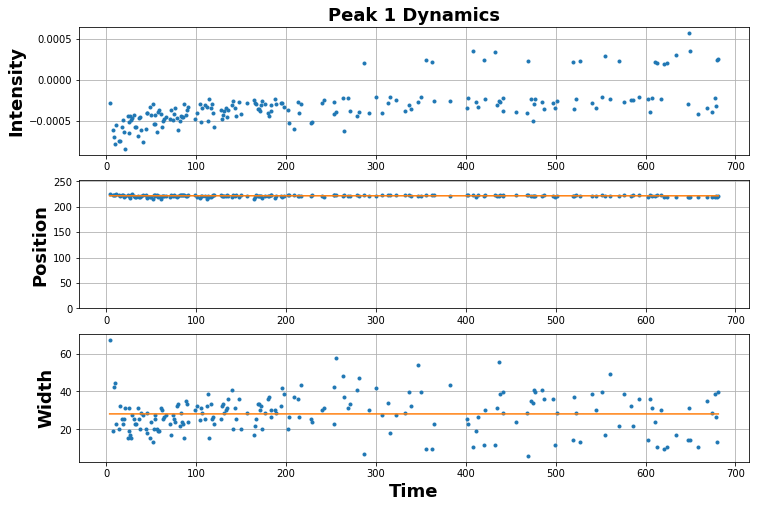

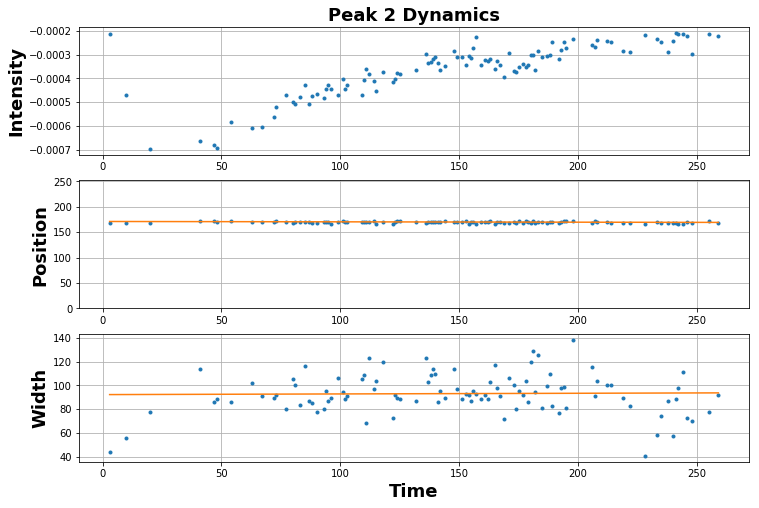

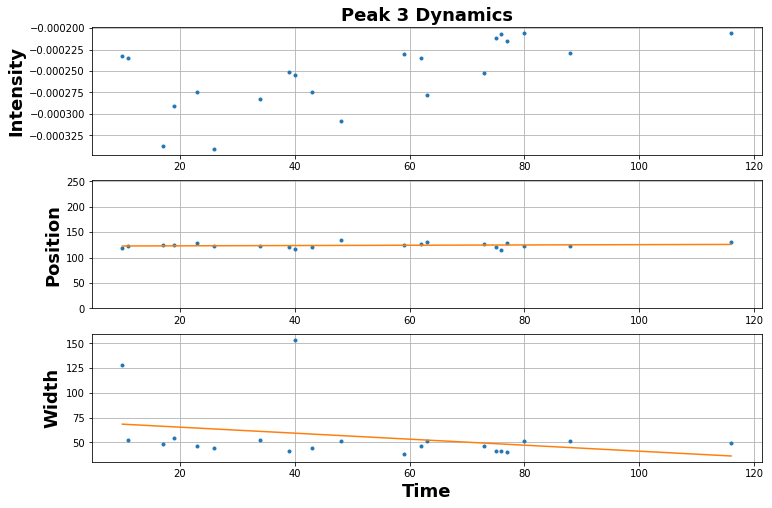

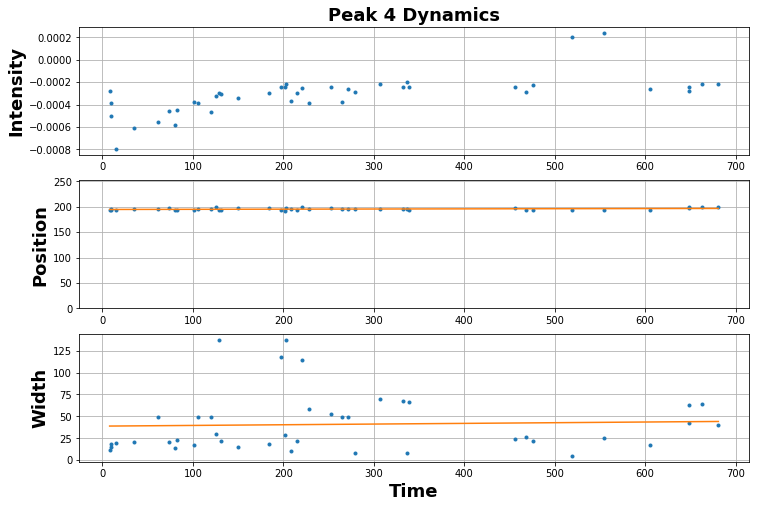

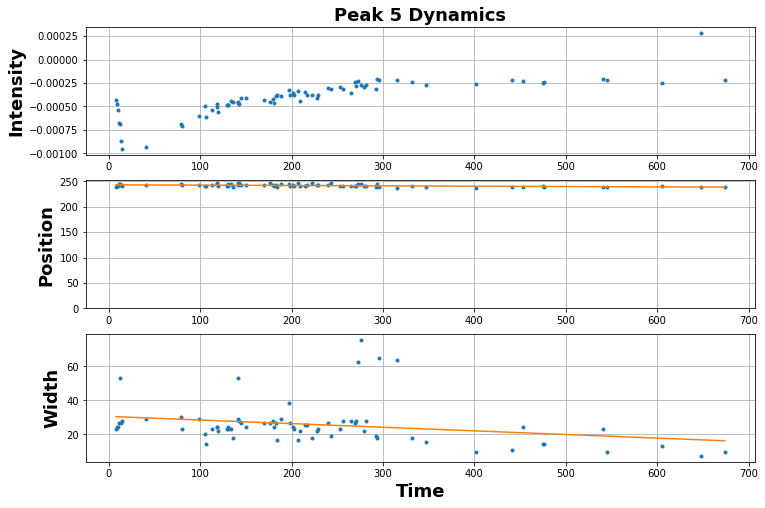

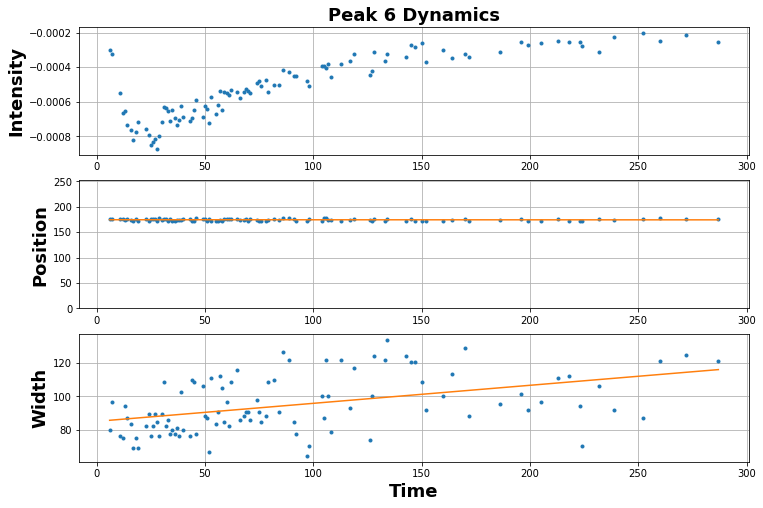

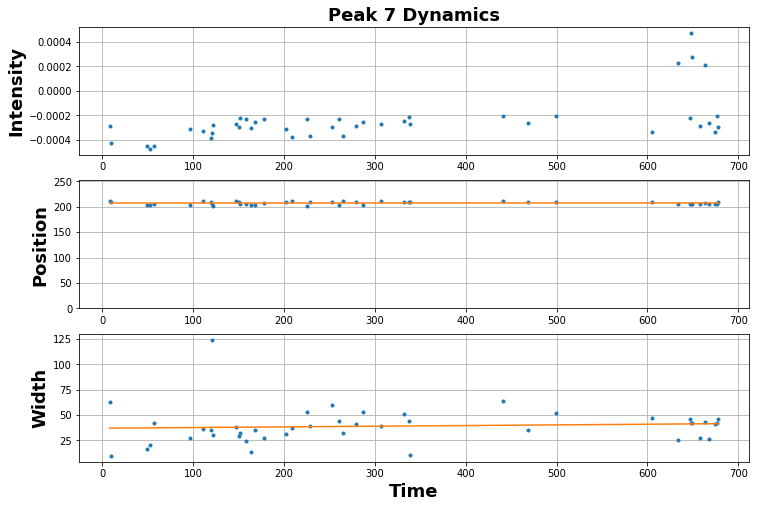

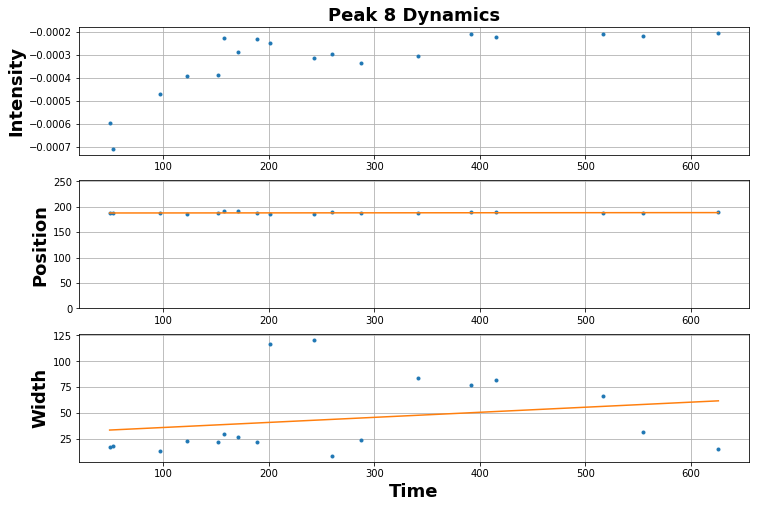

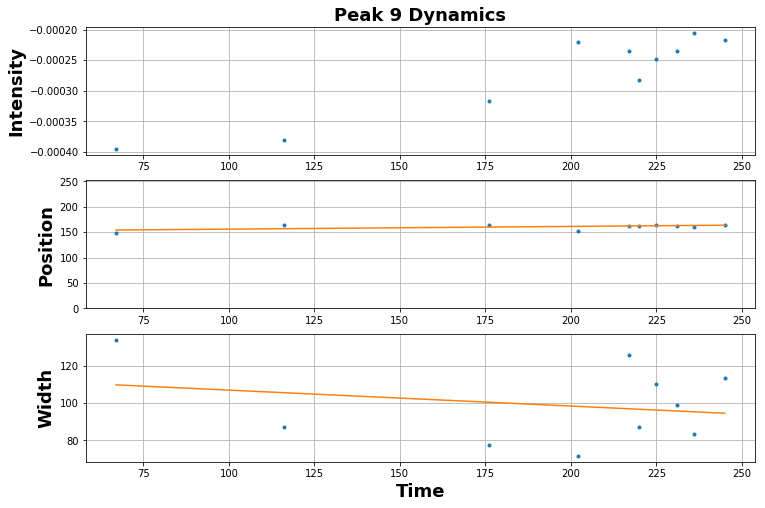

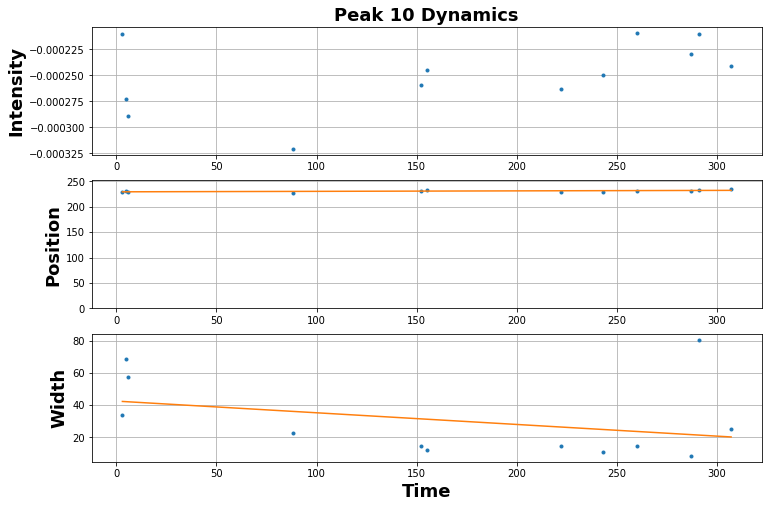

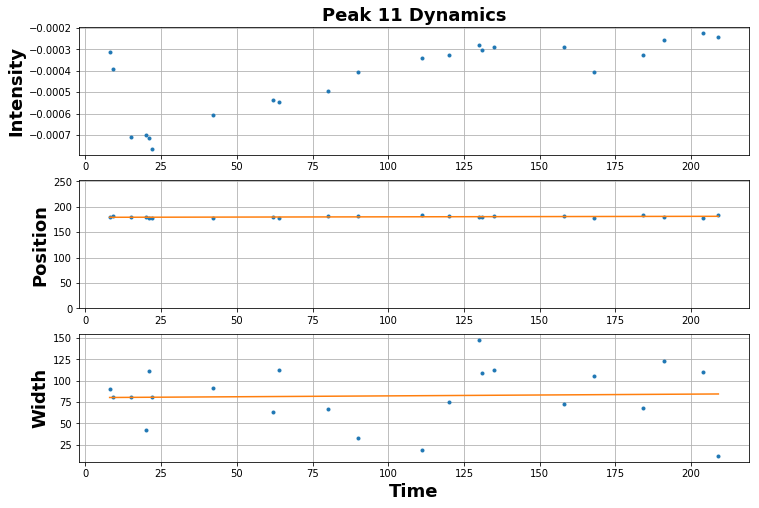

In [110]:
KMeans_output = visualize(peak_dict, data_nm)

# Peak Dynamics Without Classifying

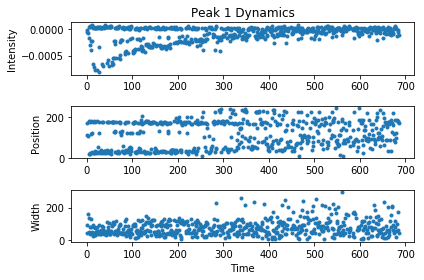

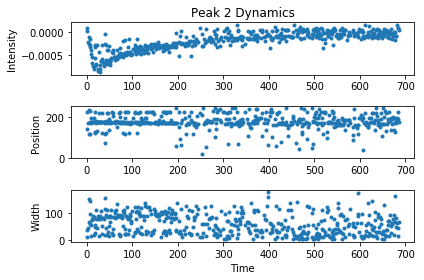

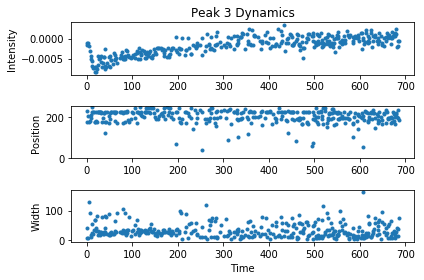

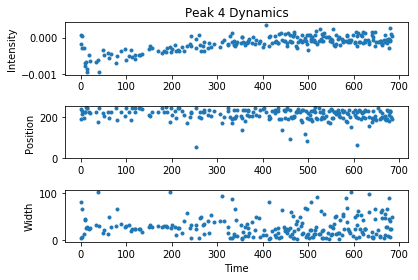

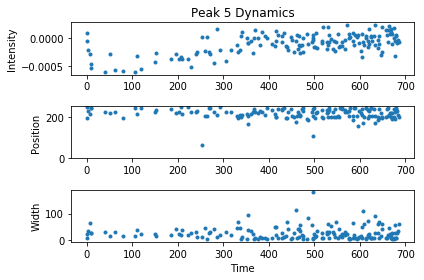

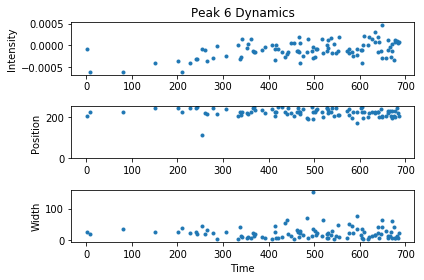

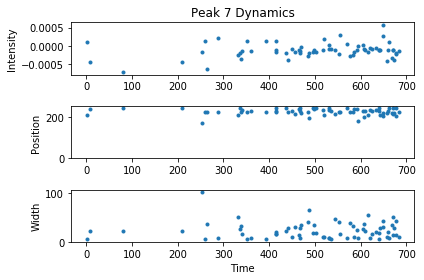

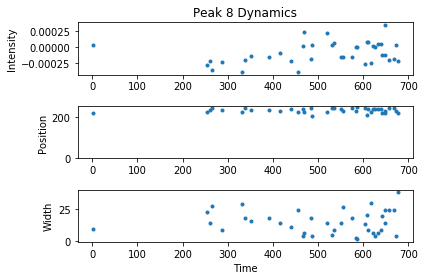

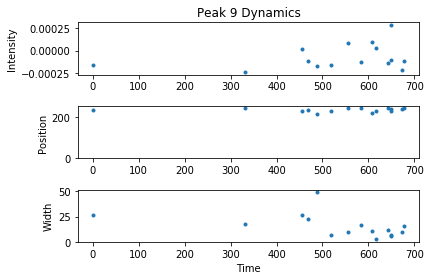

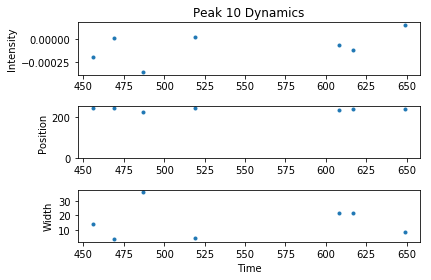

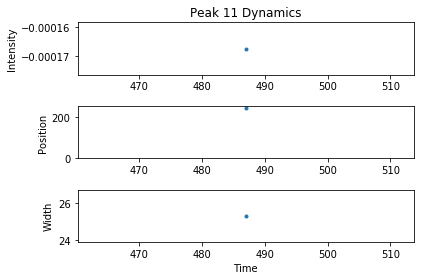

In [82]:
for i in range(idx.shape[1]):
        plt.subplot(3, 1, 1)
        plt.plot(height.loc[:, i], '.')
        plt.title('Peak %s Dynamics' % (i+1))
        plt.ylabel('Intensity')

        plt.subplot(3, 1, 2)
        plt.plot(idx.loc[:, i], '.')
        plt.ylabel('Position')
        plt.ylim((0, data_nm.shape[0]))

        plt.subplot(3, 1, 3)
        plt.plot(fwhm.loc[:, i], '.')
        plt.ylabel('Width')
        plt.xlabel('Time')
        plt.tight_layout()
        plt.show()

# True Data:
* Peak 1: Intense peak at ~950nm (idx~20), maximum intensity ~-0.005, disappears by time 300.
* Peak 2: Broad peak at ~1100nm (idx~50), maximum intensity ~-0.0015, grows in at time 200 and persists for duration of experiment.

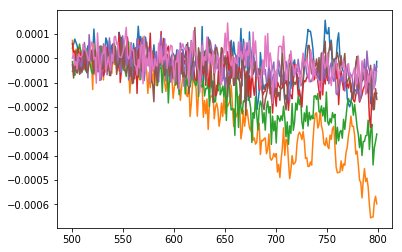

In [54]:
plt.plot(data_nm, data_z[:,1::100])

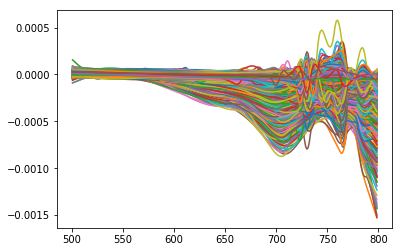

In [69]:
plt.plot(data_nm, smooth_matx)

In [66]:
len(smooth_matx)

252